In [33]:
# import
import numpy as np
import scipy as sp
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

**Comparing the time**

In [34]:
start = timeit.timeit()

X = range(1000)

pySum = sum([n*n for n in X])

end = timeit.timeit()

print("Total time taken: ", end-start)

Total time taken:  -0.0013046470626534301


** Learning Scipy **

In [35]:
# reading the web data 

data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:3])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]]


** Preprocessing and Cleaning the data **

In [36]:
X = data[:, 0]
y = data[:, 1]

# checking for nan values
print(sum(np.isnan(X)))
print(sum(np.isnan(y)))

0
8


** Filtering the nan data **

In [37]:
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# checking for nan values
print(sum(np.isnan(X)))
print(sum(np.isnan(y)))

0
0


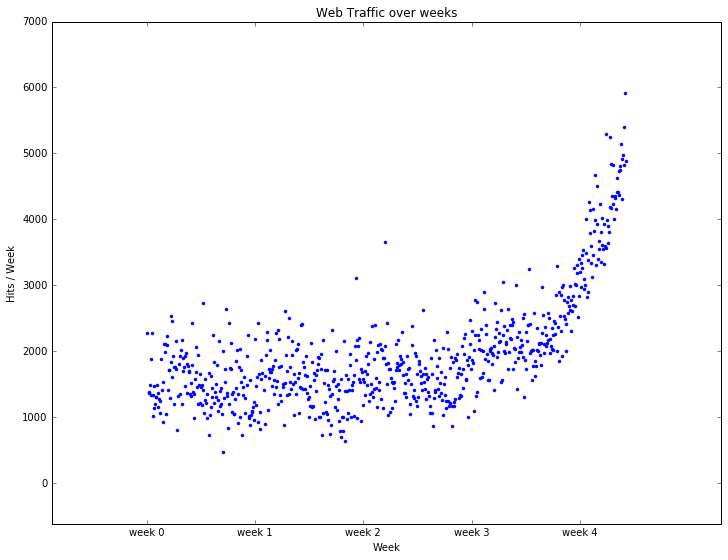

In [38]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(X, y, '.b')
ax.margins(0.2)
plt.xticks([w*24*7 for w in range(0, 5)], ["week %d" %w for w in range(0, 5)])
ax.set_xlabel("Week")
ax.set_ylabel("Hits / Week")
ax.set_title("Web Traffic over weeks")

** Choosing the right model and learning algorithm **

In [39]:
# creating a error calc fuction
def error(f, x, y):
    return np.sum((f(x) - y)**2)

** Linear 1-d model **

[   2.59619213  989.02487106]
[  3.17389767e+08]
Error :  317389767.34


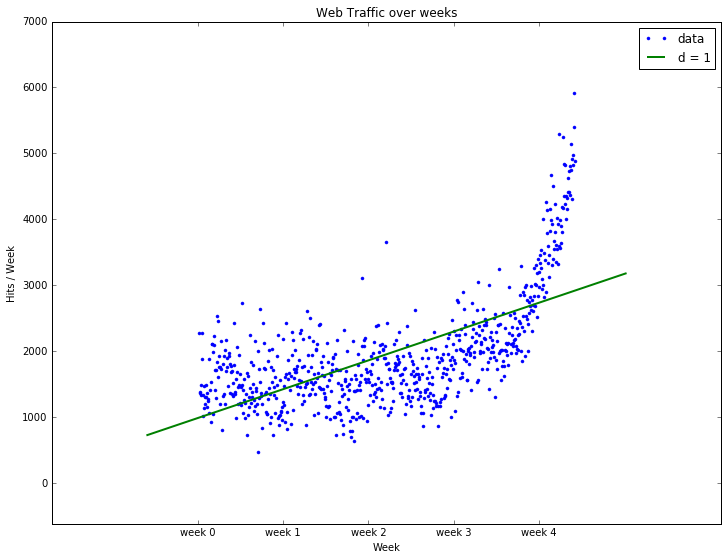

In [40]:
# sp's polyfit func do the same
fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full=True)

print(fp1)
print(residuals)

# generating the one order function
f1 = sp.poly1d(fp1)

# checking error
print("Error : ",error(f1, X, y))

x1 = np.array([-100, np.max(X)+100])
y1 = f1(x1)

ax.plot(x1, y1, c='g', linewidth=2)
ax.legend(["data", "d = %i" % f1.order], loc='best')
fig

 $$ f(x) = 2.59619213 * x + 989.02487106 $$ 
 
 ** Polynomial 2-d **

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Error :  179983507.878


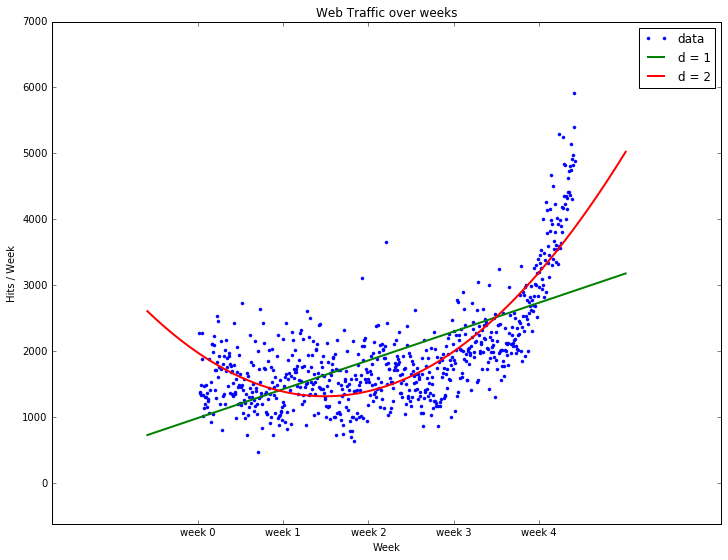

In [41]:
# sp's polyfit func do the same
fp2 = sp.polyfit(X, y, 2)

print(fp2)

# generating the 2 order function
f2= sp.poly1d(fp2)

# checking error
print("Error : ",error(f2, X, y))

x1= np.linspace(-100, np.max(X)+100, 2000)
y2= f2(x1)

ax.plot(x1, y2, c='r', linewidth=2)
ax.legend(["data", "d = %i" % f1.order, "d = %i" % f2.order], loc='best')
fig

$$  f(x) = 0.0105322215 * x^2 - 5.26545650 * x + 1974.6082 $$

What if we want to regress two response output instead of one, As we can see in the graph that there is a steep change in data between week 3 and 4, so let's draw two reponses line, one for the data between week0 and week3.5 and second for week3.5 to week5

In [42]:
# we are going to divide the data on time so
div = 3.5*7*24

X1 = X[X<=div]
Y1 = y[X<=div]

X2 = X[X>div]
Y2 = y[X>div]


In [43]:
# now plotting the both data

fa = sp.poly1d(sp.polyfit(X1, Y1, 1))
fb = sp.poly1d(sp.polyfit(X2, Y2, 1))

fa_error = error(fa, X1, Y1)
fb_error = error(fb, X2, Y2)
print("Error inflection = %f" % (fa_error + fb_error))

Error inflection = 135015350.586215


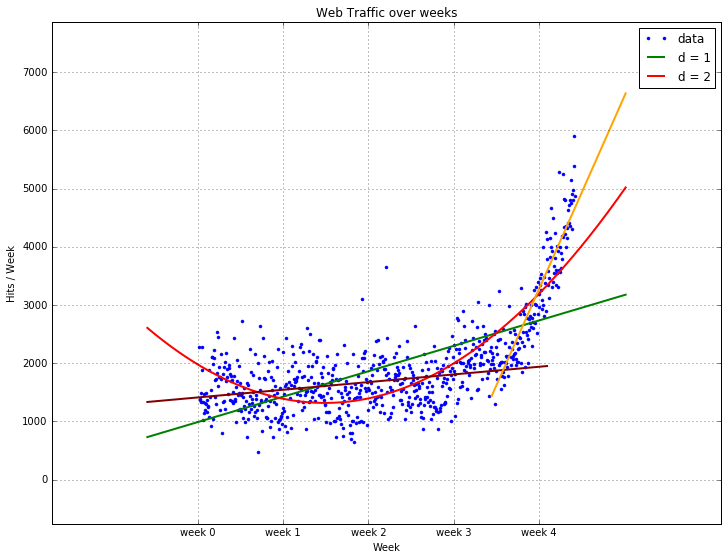

In [44]:
x1 = np.linspace(-100, X1[-1]+100, 1000)
x2 = np.linspace(X1[-10], X2[-1]+100, 1000)

ya = fa(x1)
yb = fb(x2)

ax.plot(x1, ya, c='#800000', linewidth=2)  # brown
ax.plot(x2, yb, c='#FFA500', linewidth=2)  # orange
ax.grid(True)


fig

Suppose we choose that function with degree 2 is best fit for our data and want to predict that if everything will go same then when we will hit the 100000 count